In [91]:
#coding:utf-8
import json
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  #忽略python运行过程中的警告错误

In [92]:
#数据可视化
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  #导入词云包
from scipy.misc import imread
get_ipython().magic('matplotlib inline')

In [93]:
credits_file = 'E:/Kaggle/Movie/tmdb_5000_credits.csv'
movies_file = 'E:/Kaggle/Movie/tmdb_5000_movies.csv'
credits = pd.read_csv(credits_file)
movies = pd.read_csv(movies_file)

In [94]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [95]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [96]:
#数据清洗
#合并数据集
fulldf = pd.concat([credits, movies], axis = 1)
#查看合并后的数据集信息
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

In [97]:
#选取子集
moviesdf = fulldf[['original_title','crew','release_date','genres','keywords','production_companies',
                   'production_countries','revenue','budget','runtime','vote_average']]

moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4802 non-null object
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 412.8+ KB


In [98]:
moviesdf['profit'] = moviesdf['revenue'] - moviesdf['budget']
moviesdf.head()

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000
2,Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,245000000,148.0,6.3,635674609
3,The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,250000000,165.0,7.6,834939099
4,John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,260000000,132.0,6.1,24139100


In [99]:
#缺失值处理
release_date_null = moviesdf['release_date'].isnull()
moviesdf.loc[release_date_null, :]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
4553,America Is Still the Place,[],NaN,[],[],[],[],0,0,0.0,0.0,0


In [100]:
#填充指定日期
moviesdf['release_date'] = movies['release_date'].fillna('2014-06-01')
#修改日期格式
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date'], format = '%Y-%m-%d')
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4803 non-null datetime64[ns]
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
profit                  4803 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 450.4+ KB


In [101]:
#找出runtime缺失的数据
runtime_date_null = moviesdf['runtime'].isnull()
moviesdf.loc[runtime_date_null, :]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,NaN,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,NaN,0.0,-2


In [102]:
#填充runtime缺失值
values1 = {'runtime' : 98.0}
values2 = {'runtime' : 81.0}
moviesdf.fillna(value = values1, limit = 1, inplace = True)
moviesdf.fillna(value = values2, limit = 1, inplace = True)

moviesdf.loc[runtime_date_null, :]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,98.0,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,81.0,0.0,-2


In [103]:
#数据格式转换
#genres列格式化，建立包含所有genre类型的列表
moviesdf['genres'] = moviesdf['genres'].apply(json.loads)
#自定义函数解码json数据
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)

moviesdf['genres'] = moviesdf['genres'].apply(decode)
moviesdf.head(2)

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000


In [104]:
#建立genres列表，提取电影的类型
genres_list = set()
print(moviesdf['genres'])
for i in moviesdf['genres'].str.split(' '):
    genres_list = set().union(i, genres_list)
    genres_list = list(genres_list)
    genres_list
    
genres_list.remove('')
print(genres_list)

0        Action Adventure Fantasy Science Fiction
1                        Adventure Fantasy Action
2                          Action Adventure Crime
3                     Action Crime Drama Thriller
4                Action Adventure Science Fiction
5                        Fantasy Action Adventure
6                                Animation Family
7                Action Adventure Science Fiction
8                        Adventure Fantasy Family
9                        Action Adventure Fantasy
10       Adventure Fantasy Action Science Fiction
11                Adventure Action Thriller Crime
12                       Adventure Fantasy Action
13                       Action Adventure Western
14       Action Adventure Fantasy Science Fiction
15                       Adventure Family Fantasy
16               Science Fiction Action Adventure
17                       Adventure Action Fantasy
18                  Action Comedy Science Fiction
19                       Action Adventure Fantasy


In [105]:
#release_data列数据处理
#保留日期中的年份
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date']).dt.year
columns = {'release_date' : 'year'}
moviesdf.rename(columns = columns, inplace = True)
moviesdf['year'].apply(int).head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: year, dtype: int64

In [106]:
#数据分析及可视化
for genre in genres_list:
    moviesdf[genre] = moviesdf['genres'].str.contains(genre).apply(lambda x : 1 if x else 0)

print(moviesdf)   

                                   original_title  \
0                                          Avatar   
1        Pirates of the Caribbean: At World's End   
2                                         Spectre   
3                           The Dark Knight Rises   
4                                     John Carter   
5                                    Spider-Man 3   
6                                         Tangled   
7                         Avengers: Age of Ultron   
8          Harry Potter and the Half-Blood Prince   
9              Batman v Superman: Dawn of Justice   
10                               Superman Returns   
11                              Quantum of Solace   
12     Pirates of the Caribbean: Dead Man's Chest   
13                                The Lone Ranger   
14                                   Man of Steel   
15       The Chronicles of Narnia: Prince Caspian   
16                                   The Avengers   
17    Pirates of the Caribbean: On Stranger Ti

In [107]:
genre_year = moviesdf.loc[:,genres_list]
print(genre_year)

      Science  Movie  Fantasy  TV  Foreign  Mystery  Documentary  Comedy  War  \
0           1      0        1   0        0        0            0       0    0   
1           0      0        1   0        0        0            0       0    0   
2           0      0        0   0        0        0            0       0    0   
3           0      0        0   0        0        0            0       0    0   
4           1      0        0   0        0        0            0       0    0   
5           0      0        1   0        0        0            0       0    0   
6           0      0        0   0        0        0            0       0    0   
7           1      0        0   0        0        0            0       0    0   
8           0      0        1   0        0        0            0       0    0   
9           0      0        1   0        0        0            0       0    0   
10          1      0        1   0        0        0            0       0    0   
11          0      0        

In [108]:
#把年份作为索引标签
genre_year.index = moviesdf['year']
#将数据集按年份分组并求和，得出每个年份，各电影类型的电影总数
genresdf = genre_year.groupby('year').sum()
#查看数据集，tail默认查看后5行的数据
genresdf.tail()

,Science,Movie,Fantasy,TV,Foreign,Mystery,Documentary,Comedy,War,Adventure,...,Action,Romance,Drama,Fiction,Western,Horror,Thriller,History,Family,Crime
year,,,,,,,,,,,,,,,,,,,,,
2013,27,2,21,2,0,5,10,71,3,36,...,56,25,110,27,1,25,53,8,22,37
2014,26,0,16,0,0,15,7,62,10,37,...,54,24,110,26,3,21,66,7,23,27
2015,28,0,10,0,0,20,7,52,2,35,...,46,23,95,28,7,33,67,9,17,26
2016,11,0,13,0,0,6,0,26,3,23,...,39,9,37,11,1,20,27,6,9,10
2017,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [109]:
#汇总电影类型的数量
genresdfSum = genresdf.sum(axis = 0).sort_values(ascending = False)
genresdfSum

Drama          2297
Comedy         1722
Thriller       1274
Action         1154
Romance         894
Adventure       790
Crime           696
Science         535
Fiction         535
Horror          519
Family          513
Fantasy         424
Mystery         348
Animation       234
History         197
Music           185
War             144
Documentary     110
Western          82
Foreign          34
TV                8
Movie             8
dtype: int64

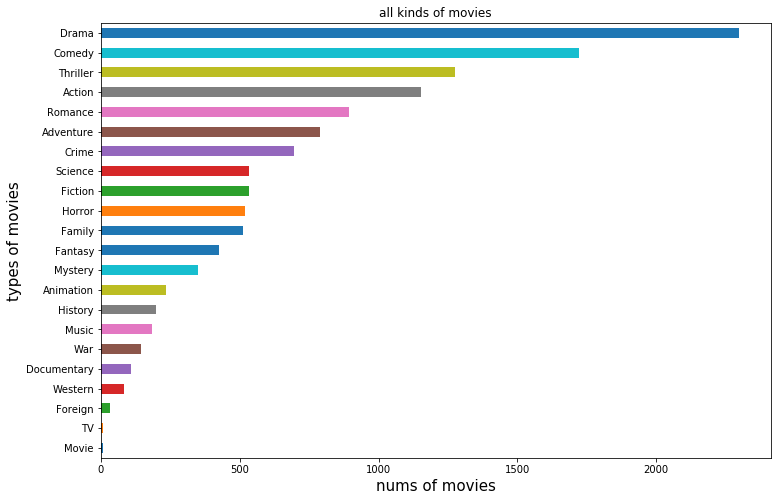

In [110]:
#绘制柱状图
#设置画板大小
fig = plt.figure(figsize = (12, 8))
#创建画纸
ax1 = plt.subplot(111)
#在画纸上绘图
#电影类型的数量按降序排列
rects = genresdfSum.sort_values(ascending = True).plot(kind = 'barh', label = 'genres')
plt.title('all kinds of movies')
plt.xlabel('nums of movies', fontsize = 15)
plt.ylabel('types of movies', fontsize = 15)
plt.show()

In [111]:
#绘制饼状图
genres_pie = genresdfSum / genresdfSum.sum()
# 设置other类，当电影类型所占比例小于%1时，全部归到other类中
others = 0.01
genres_pie_otr = genres_pie[genres_pie >= others]
genres_pie_otr['Other'] = genres_pie[genres_pie < others].sum()
print(genres_pie_otr)

Drama        0.180823
Comedy       0.135559
Thriller     0.100291
Action       0.090845
Romance      0.070377
Adventure    0.062190
Crime        0.054790
Science      0.042116
Fiction      0.042116
Horror       0.040856
Family       0.040384
Fantasy      0.033378
Mystery      0.027395
Animation    0.018421
History      0.015508
Music        0.014563
War          0.011336
Other        0.019051
dtype: float64


Text(0.5,1,'the percent of all types of movies')

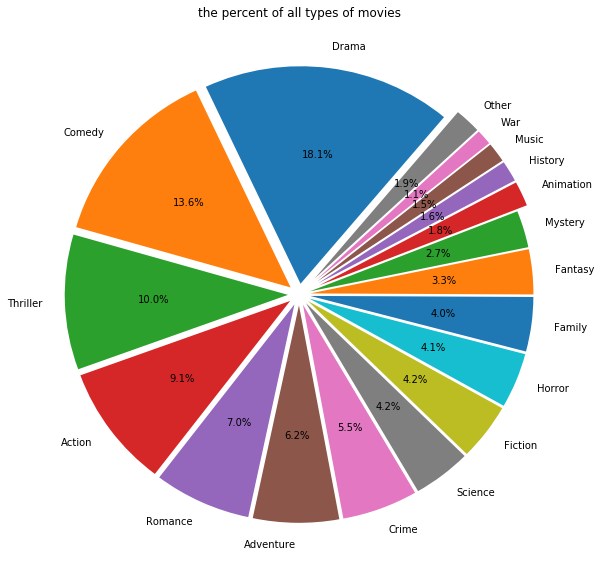

In [112]:
# 所占比例小于或等于%2时，对应的饼状图往外长高一截
explode = (genres_pie_otr <= 0.02) / 20 + 0.05 
#设置饼状图的参数
genres_pie_otr.plot(kind = 'pie', label = '', startangle = 50, shadow = False, figsize = (10, 10), autopct = '%1.1f%%', explode = explode)
plt.title('the percent of all types of movies')
# 1.从上面的结果可以看出，在所有的电影类型中，Drama(戏剧)类型电影最多，占所有电影类型的18.9%，其次为Comedy(喜剧)，占所有电影类型的14.2%。
# 
# 2.在所有电影类型中，电影数量排名前5的电影类型分别为：Drama(戏剧)、Comedy(喜剧)、Thriller(惊悚)、Action（动作）、Romance（冒险）。

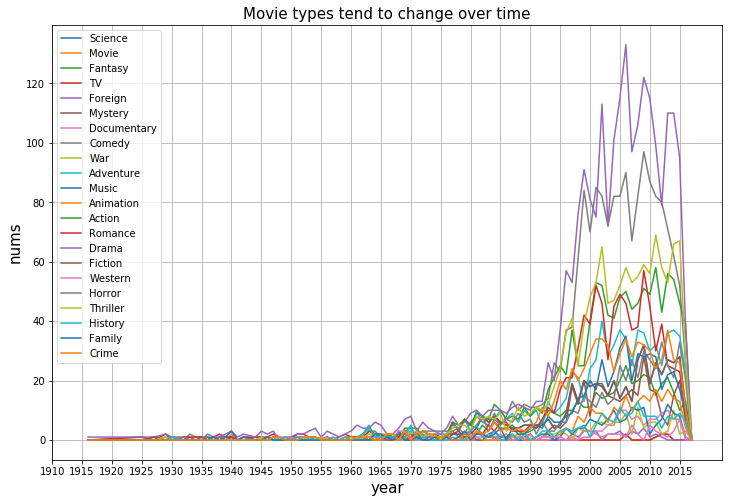

In [113]:
plt.figure(figsize = (12, 8))
plt.plot(genresdf, label = genresdf.columns)
plt.xticks(range(1910, 2018, 5))
plt.legend(genresdf)
plt.title('Movie types tend to change over time', fontsize = 15)
plt.xlabel('year', fontsize = 15)
plt.ylabel('nums', fontsize = 15)
plt.grid(True)
plt.show()

In [114]:
#把电影类型作为索引
mean_genre_profit = pd.DataFrame(index = genres_list)
#求出每种电影类型的平均利润
newarray = []
for genre in genres_list:
    newarray.append(moviesdf.groupby(genre, as_index = True)['profit'].mean())
print(newarray)
newarray2 = []
for i in range(len(genres_list)):
    newarray2.append(newarray[i][1])
mean_genre_profit['mean_profit'] = newarray2
mean_genre_profit.head()

[Science
0    4.727703e+07
1    1.005910e+08
Name: profit, dtype: float64, Movie
0    5.330630e+07
1   -1.150000e+06
Name: profit, dtype: float64, Fantasy
0    4.580087e+07
1    1.297936e+08
Name: profit, dtype: float64, TV
0    5.330630e+07
1   -1.150000e+06
Name: profit, dtype: float64, Foreign
0    5.359708e+07
1   -2.934369e+05
Name: profit, dtype: float64, Mystery
0    5.365766e+07
1    4.755644e+07
Name: profit, dtype: float64, Documentary
0    5.429450e+07
1    7.185600e+06
Name: profit, dtype: float64, Comedy
0    5.726184e+07
1    4.597608e+07
Name: profit, dtype: float64, War
0    5.334981e+07
1    4.887342e+07
Name: profit, dtype: float64, Adventure
0    3.567186e+07
1    1.423333e+08
Name: profit, dtype: float64, Music
0    5.404356e+07
1    3.254800e+07
Name: profit, dtype: float64, Animation
0    4.778625e+07
1    1.592271e+08
Name: profit, dtype: float64, Action
0    4.167663e+07
1    8.970235e+07
Name: profit, dtype: float64, Romance
0    5.630871e+07
1    3.969103e+07


,mean_profit
Science,1.005910e+08
Movie,-1.150000e+06
Fantasy,1.297936e+08
TV,-1.150000e+06
Foreign,-2.934369e+05


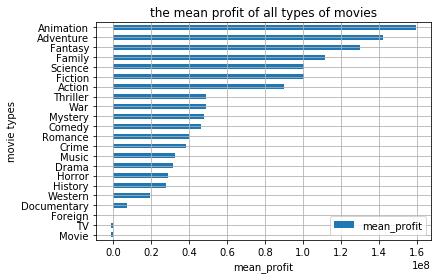

In [115]:
plt.figure(figsize = (12, 8))
#对于mean_profit列数据按值大小进行降序排序
mean_genre_profit.sort_values(by = 'mean_profit', ascending = True).plot(kind = 'barh')
plt.title('the mean profit of all types of movies')
plt.xlabel('mean_profit')
plt.ylabel('movie types')
plt.grid(True)
plt.show()

In [116]:
#production_companies列数据格式化
moviesdf['production_companies'] = moviesdf['production_companies'].apply(json.loads)
#调用自定义函数decode处理production_companies列数据
moviesdf['production_companies'] = moviesdf['production_companies'].apply(decode)
moviesdf.head(2)

,original_title,crew,year,genres,keywords,production_companies,production_countries,revenue,budget,runtime,...,Action,Romance,Drama,Fiction,Western,Horror,Thriller,History,Family,Crime
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Ingenious Film Partners Twentieth Century Fox ...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,...,1,0,0,1,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Walt Disney Pictures Jerry Bruckheimer Films S...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,...,1,0,0,0,0,0,0,0,0,0


In [118]:
# 查询production_companies数据列中是否含有Universal Pictures、Paramount Pictures，有则标记为1
moviesdf['Universal Pictures'] = moviesdf['production_companies'].str.contains('Universal Picture').apply(lambda x : 1 if x else 0)
moviesdf['Paramount Pictures'] = moviesdf['production_companies'].str.contains('Paramount Picture').apply(lambda x : 1 if x else 0)

In [119]:
# 统计Universal Pictures和Paramount Pictures的数据
a = moviesdf['Universal Pictures'].sum()
b = moviesdf['Paramount Pictures'].sum()
dict_company = {'Universal' : a , 'Paramount' : b}
company_vs = pd.Series(dict_company)
company_vs

Paramount    285
Universal    314
dtype: int64

Text(0.5,1,'Universal Pictures and Paramount Picture')

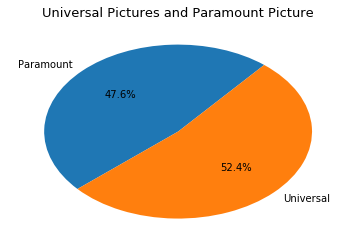

In [120]:
# 使用饼状图显示两家公司发行电影所占的比例
company_vs.plot(kind = 'pie', label = '', startangle = 50, shadow = False, autopct = '%1.1f%%')
plt.title('Universal Pictures and Paramount Picture', fontsize = 13)

In [122]:
# 抽取相关数据列，以release_year作为索引
companydf = moviesdf[['Universal Pictures', 'Paramount Pictures']]
companydf.index = moviesdf['year']

# 对Universal和Paramount公司的发行数量按年分组求和
companydf = companydf.groupby('year').sum()
companydf.tail()

,Universal Pictures,Paramount Pictures
year,,
2013,9,8
2014,10,8
2015,13,7
2016,10,5
2017,0,0


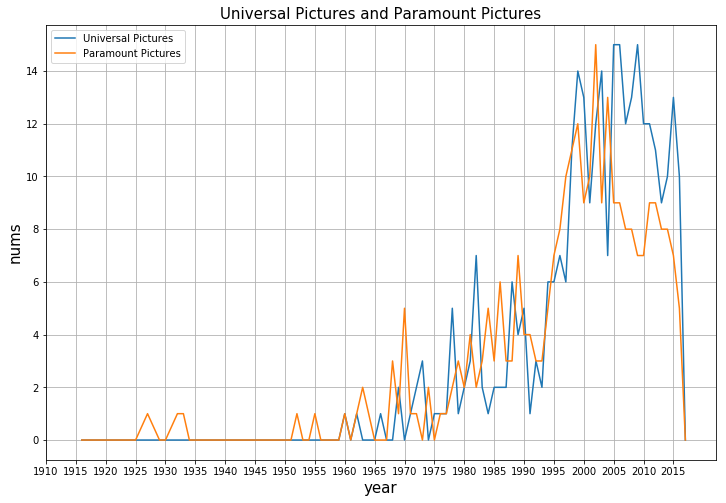

In [123]:
plt.figure(figsize = (12, 8))
plt.plot(companydf, label = companydf.columns)
plt.xticks(range(1910, 2018, 5))
plt.legend(companydf)
plt.title('Universal Pictures and Paramount Pictures',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('nums',fontsize=15)
plt.grid(True)
plt.show()

In [124]:
#keywords列数据格式化
moviesdf['keywords'] = moviesdf['keywords'].apply(json.loads)
# 调用自定义函数decode处理keywords列数据
moviesdf['keywords'] = moviesdf['keywords'].apply(decode)
moviesdf['keywords'].tail()

4798    united states–mexico barrier legs arms paper k...
4799                                                     
4800    date love at first sight narration investigati...
4801                                                     
4802                 obsession camcorder crush dream girl
Name: keywords, dtype: object

In [125]:
#提取关键字
a = 'based on novel'
moviesdf['if_original'] = moviesdf['keywords'].str.contains(a).apply(lambda x : 'no original' if x else 'original')
moviesdf['if_original'].value_counts()

original_profit = moviesdf[['if_original','budget','revenue','profit']]
original_profit = original_profit.groupby(by='if_original').mean()
original_profit

,budget,revenue,profit
if_original,,,
no original,4.532546e+07,1.438100e+08,9.848457e+07
original,2.834872e+07,7.962815e+07,5.127943e+07


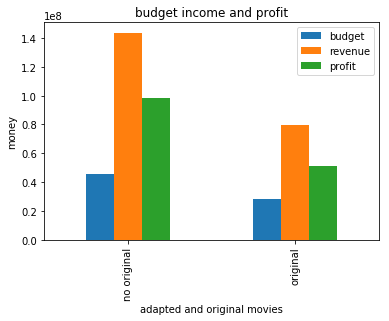

In [126]:
# 数据可视化
plt.figure(figsize=(12,8))
original_profit.plot(kind='bar')
plt.title('budget income and profit')
plt.xlabel('adapted and original movies')
plt.ylabel('money')
plt.show()

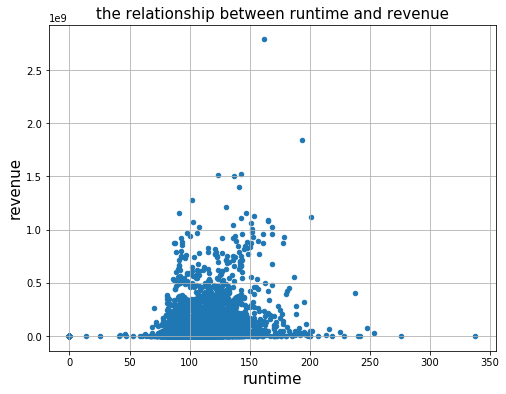

In [127]:
# 电影时长与电影票房的关系
moviesdf.plot(kind='scatter', x='runtime', y='revenue', figsize=(8, 6))
plt.title('the relationship between runtime and revenue',fontsize=15)
plt.xlabel('runtime',fontsize=15)
plt.ylabel('revenue',fontsize=15)
plt.grid(True)
plt.show()

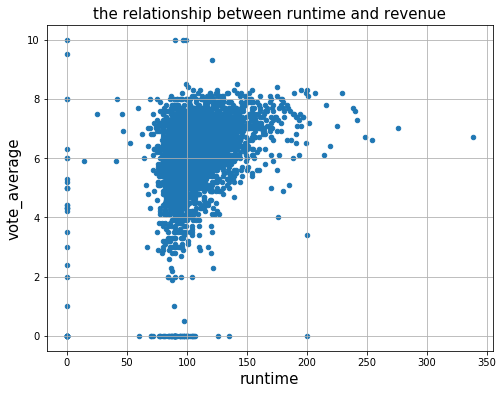

In [128]:
# 电影时长与评分的关系
moviesdf.plot(kind='scatter', x='runtime', y='vote_average', figsize=(8, 6))
plt.title('the relationship between runtime and revenue',fontsize=15)
plt.xlabel('runtime',fontsize=15)
plt.ylabel('vote_average',fontsize=15)
plt.grid(True)
plt.show()

In [130]:
# 建立keywords_list列表
keywords_list = []
for i in moviesdf['keywords']:
    keywords_list.append(i)
    keywords_list = list(keywords_list)
    keywords_list
print(keywords_list)

['culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d', "ocean drug abuse exotic island east india trading company love of one's life traitor shipwreck strong woman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger", 'spy based on novel secret agent sequel mi6 british secret service united kingdom', 'dc comics crime fighter terrorist secret identity burglar hostage drama time bomb gotham city vigilante cover-up superhero villainess tragic hero terrorism destruction catwoman cat burglar imax flood criminal underworld batman', 'based on novel mars medallion space travel princess alien steampunk martian escape edgar rice burroughs alien race superhuman strength mars civilization sword and planet 19th century 3d', "dual identity amnesia sandstorm love of one's life forgiveness spider wretch death of a friend egomania sa

In [131]:
# 把字符串列表连接成一个长字符串
lis = ''.join(keywords_list)
# 使用空格替换中间多余的字符串'\'s'
lis.replace('\'s','')

'culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3docean drug abuse exotic island east india trading company love of one life traitor shipwreck strong woman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstingerspy based on novel secret agent sequel mi6 british secret service united kingdomdc comics crime fighter terrorist secret identity burglar hostage drama time bomb gotham city vigilante cover-up superhero villainess tragic hero terrorism destruction catwoman cat burglar imax flood criminal underworld batmanbased on novel mars medallion space travel princess alien steampunk martian escape edgar rice burroughs alien race superhuman strength mars civilization sword and planet 19th century 3ddual identity amnesia sandstorm love of one life forgiveness spider wretch death of a friend egomania sand narcism hostility marv

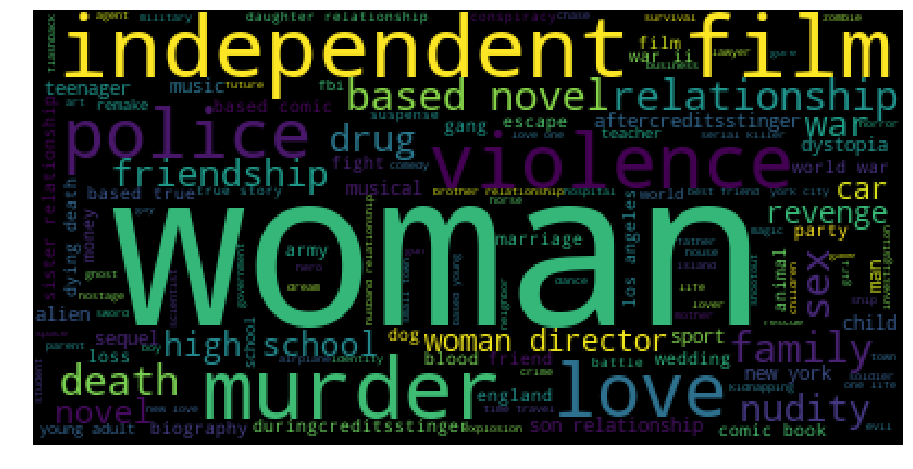

In [135]:
# 生成词云
wc = WordCloud( background_color="black", # 背景颜色  
                max_words=2000,           # 词云显示的最大词数  
                max_font_size=100,        # 字体最大值  
                random_state=12,          # 设置一个随机种子，用于随机着色
                )
# 根据字符串生成词云
wc.generate(lis)
  
plt.figure(figsize=(16, 8))
# 以下代码显示图片  
plt.imshow(wc)  
plt.axis("off")  
plt.show()  